# Customer Personality Analysis
고객 특성 분석
https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

<br>

https://www.kaggle.com/code/seungbumlim/how-to-select-the-optimal-number-for-pca-kmeans/notebook
    
https://www.kaggle.com/code/ahmetburabua/customer-personality-analysis-clustering/notebook

<br>

### ~7/24
1. 추가변수/파생변수 더 생각해보고
2. Income과 상관관계 파악해보기

<br>

#### loading dataset

In [1]:
import pandas as pd
df = pd.read_csv("marketing_campaign.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<br>

#### data preprocessing

1. Age
<br>100살 이하의 고객만 남기기

In [3]:
df["Age"] = 2022 - df["Year_Birth"]

In [4]:
df = df[df.Age < 100]

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,65
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,68
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,57
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,38
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,41


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2237 non-null   int64  
 1   Year_Birth           2237 non-null   int64  
 2   Education            2237 non-null   object 
 3   Marital_Status       2237 non-null   object 
 4   Income               2213 non-null   float64
 5   Kidhome              2237 non-null   int64  
 6   Teenhome             2237 non-null   int64  
 7   Dt_Customer          2237 non-null   object 
 8   Recency              2237 non-null   int64  
 9   MntWines             2237 non-null   int64  
 10  MntFruits            2237 non-null   int64  
 11  MntMeatProducts      2237 non-null   int64  
 12  MntFishProducts      2237 non-null   int64  
 13  MntSweetProducts     2237 non-null   int64  
 14  MntGoldProds         2237 non-null   int64  
 15  NumDealsPurchases    2237 non-null   i

<br>

2. Income
<br> (1) 이상치 제거 → 8개

In [7]:
q1 = df.Income.quantile(0.25)
q3 = df.Income.quantile(0.75)

iqr = q3 - q1

lower = q1 - iqr*1.5
upper = q3 + iqr*1.5
print(df[df.Income > upper].Income, df[df.Income < lower].Income)

164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64 Series([], Name: Income, dtype: float64)


In [8]:
df = df.drop(df[df.Income > upper].Income.index)

2. Income
<br>(2) 결측치 제거 → 24개

In [9]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
dtype: int64

<br>

3. 추가변수

<br>(1) Education 교육수준 → 졸업 전후로 나눈 후 더미변수변환

Education
- Graduation : 졸업 *(Postgraduate)*
- PhD : 박사 *(Postgraduate)*
- Master : 석사 *(Postgraduate)*
<br>

- 2n Cycle : 2번째 학위취득 *(Undergraduate)*
- Basic : 대학기초과정 *(Undergraduate)*

In [12]:
df["Education"].value_counts()

Graduation    1113
PhD            476
Master         364
2n Cycle       198
Basic           54
Name: Education, dtype: int64

In [13]:
df["Education"] = df["Education"].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 
                                           'Graduation':'Postgraduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

In [14]:
df = pd.get_dummies(df, columns = ['Education'])

(2) Marital_Status 결혼상태 → 배우자 여부로 나눈 후 더미변수 변환

Marital_Status
- Married : 결혼 *(Together)*
- Together : 동거 *(Together)*
<br>

- Single : 독신 *(Single)*
- Divorced : 이혼 *(Single)*
- Widow : 과부 *(Single)*
- Alone : 독신 *(Single)*
- Absurd : 독신 *(Single)*
- YOLO : 한 번뿐인 인생을 즐기는 사람들 *(Single)*

In [15]:
df["Marital_Status"].value_counts()

Married     854
Together    568
Single      470
Divorced    230
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [16]:
df["Marital_Status"] = df["Marital_Status"].replace({'Divorced':'Single', 'Single':'Single', 'Alone':'Single',
                                                     'Widow':'Single','Absurd':'Single', 'YOLO':'Single',
                                                     'Married':'Married','Together':'Married'})

In [17]:
df = pd.get_dummies(df, columns = ['Marital_Status'])

(3) Kidhome & Teenhome

In [18]:
df["Children"] = df["Kidhome"] + df["Teenhome"]

In [19]:
df.Children.value_counts()

1    1112
0     628
2     415
3      50
Name: Children, dtype: int64

(4) Dt_Customer

In [20]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst=True)

In [21]:
from datetime import date
last_date = date(2022,7,24)
df["T"] = pd.to_numeric(df["Dt_Customer"].dt.date.apply(lambda x: (last_date - x)).dt.days, downcast="integer")

In [22]:
df["T"] #고객이 회사에 등록한 날짜로부터 오늘(24일)까지 경과 일수

0       3610
1       3060
2       3259
3       3086
4       3108
        ... 
2235    3328
2236    2966
2237    3102
2238    3103
2239    3569
Name: T, Length: 2205, dtype: int16

(5) TotalMntSpent

In [23]:
df['TotalMntSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [24]:
#불필요한 컬럼 삭제
df.drop(['ID','Dt_Customer','Z_CostContact', 'Z_Revenue','Year_Birth'], axis=1, inplace=True)

#### Correlation

<AxesSubplot:>

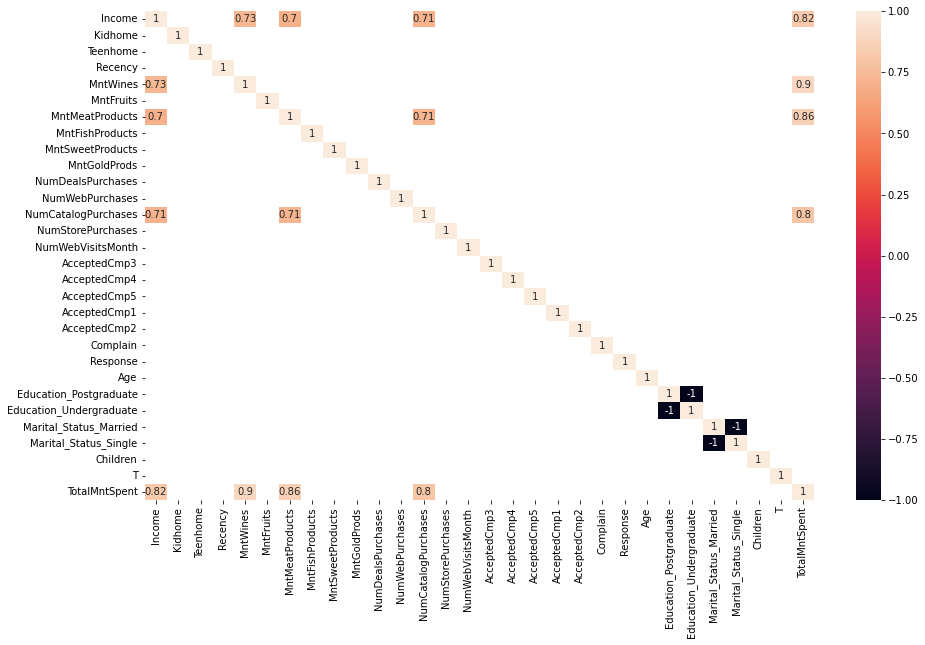

In [25]:
import seaborn as sns
import matplotlib.pylab as plt

plt.figure(figsize=(15,9))
sns.heatmap(df.corr()[(df.corr()>0.7)|(df.corr()<-0.7)],annot=True)

Income과 TotalMntSpent를 기준으로 군집화 후 모델링하면 좋을 듯 하다

#### pca (차원축소를 위한 주성분 분석)
데이터마이닝 4장

변수들의 수가 클 때, 차원 축소에 유용한 방법<br>
데이터가 같은 스케일로 측정되고 상관관계가 높은 측정치들을 포함할 때 유용


양적 변수에 대해 사용되는 분석 기법<br>
(범주형 변수의 경우 대응 분석과 같은 다른 기법들이 더 적합하다)

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
for i in cat_cols:
    df[i] = le.fit_transform(df[[i]])

In [27]:
from sklearn.preprocessing import StandardScaler, normalize

# I will do the standardization process, I will copy my data, I am doing it so as not to spoil the original.
df2 = df.copy()
# I want to leave out variables like accepted campaigns
col_del = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']
df2 = df2.drop(col_del, axis=1)

#정규화를 하지 않고 주성분 분석을 하면 상관관계가 큰 특정 변수의 분산이 총분산을 차지하기 때문에,
#주성분 분석 전에 정규화 필수
# Scaling
scaler = StandardScaler()
scaler.fit(df2)
scaled_df = pd.DataFrame(scaler.transform(df2), columns=df2.columns)
print("Scaled OK!")

Scaled OK!


In [28]:
scaled_df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,NumWebVisitsMonth,Age,Education_Postgraduate,Education_Undergraduate,Marital_Status_Married,Marital_Status_Single,Children,T,TotalMntSpent
0,0.314651,-0.823405,-0.930767,0.310830,0.974566,1.548614,1.748400,2.449154,1.480301,0.849556,...,-0.562650,0.689203,1.017189,0.359211,-0.359211,-1.347625,1.347625,-1.266589,1.527183,1.679323
1,-0.254877,1.038757,0.906602,-0.380600,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,-0.735767,...,-1.179732,-0.139645,1.273530,0.359211,-0.359211,-1.347625,1.347625,1.403420,-1.188629,-0.963897
2,0.965354,-0.823405,-0.930767,-0.795458,0.355155,0.568110,-0.175957,1.336263,-0.149031,-0.039771,...,1.288596,-0.554069,0.333612,0.359211,-0.359211,0.742046,-0.742046,-1.266589,-0.205999,0.281242
3,-1.206087,1.038757,-0.930767,-0.795458,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,-0.755100,...,-0.562650,0.274779,-1.289883,0.359211,-0.359211,0.742046,-0.742046,0.068415,-1.060245,-0.920675
4,0.322136,1.038757,-0.930767,1.555404,-0.394659,0.417263,-0.217292,0.150396,-0.003121,-0.561768,...,0.054432,-0.139645,-1.033542,0.359211,-0.359211,0.742046,-0.742046,0.068415,-0.951612,-0.307248


In [29]:
from sklearn.decomposition import PCA

# I set the number of dimensions as 3
pca = PCA(n_components=3)
pca.fit(scaled_df)
pca_df = pd.DataFrame(pca.transform(scaled_df), columns=["columns1", "columns2", "columns3"])  #PC1, PC2, PC3

In [30]:
pca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
columns1,2205.0,2.493344e-16,2.771804,-5.636025,-2.554153,-0.697006,2.443392,7.427873
columns2,2205.0,-1.530648e-17,1.591495,-4.517151,-1.040090,-0.072187,1.163706,5.222531
columns3,2205.0,6.897984e-18,1.424094,-2.672929,-1.604597,0.467757,0.896648,4.094849


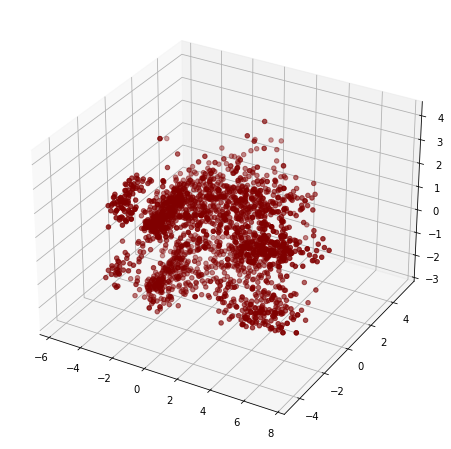

In [31]:
x = pca_df["columns1"]
y = pca_df["columns2"]
z = pca_df["columns3"]

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c="maroon", marker="o")
plt.show()

#### KMeans
데이터마이닝 4장

쉽게 말해 K개의 군집으로 나눈다.<br>
어떻게? 점과 점 사이의 거리를 가지고<br>
그럼 분류? KMeans는 비지도학습이기 때문에 군집화라고 말한다.

In [32]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

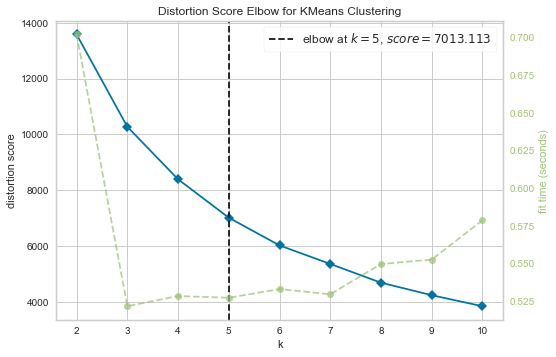

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
elbow_method = KElbowVisualizer(KMeans(), k=10)
elbow_method.fit(pca_df)
elbow_method.show()

In [34]:
###education과 marital_status에 더미변수화를 시키지 않으면 k=4입니다.###

In [35]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5, covariance_type='spherical', max_iter=2000, random_state=42).fit(pca_df)
labels = gmm.predict(pca_df)

In [36]:
pca_df['Clusters'] = labels

In [37]:
df['Clusters'] = labels

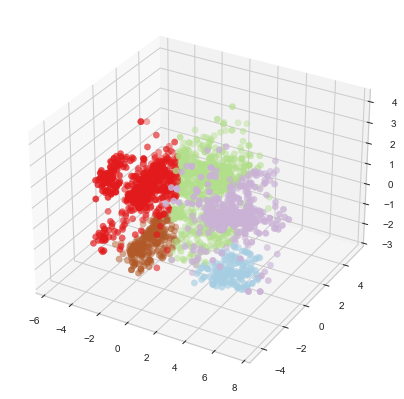

In [38]:
# Plot the clusters
fig = plt.figure(figsize=(12,7))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=pca_df['Clusters'], marker="o", cmap="Paired_r")
plt.show()